# Exercise 6c: ANOVA (Analysis of Variance) on Iris Dataset

## Objectives
- Perform ANOVA analysis on the Iris dataset
- Test for significant differences between species groups
- Create interaction plots and visualization
- Conduct post-hoc tests for detailed comparisons
- Interpret statistical results

## Dataset
We'll use the famous Iris dataset which contains measurements of sepal length, sepal width, petal length, and petal width for three species of iris flowers.

## 1. Import Required Libraries

In [3]:
# Install dependencies
%pip install -q pandas numpy matplotlib seaborn scikit-learn scipy statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy import stats
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

Note: you may need to restart the kernel to use updated packages.
All libraries imported successfully!


## 2. Load and Explore the Iris Dataset

In [ ]:
# Uncomment the following line to download the dataset from Kaggle
# !curl -sL -o iris.zip https://www.kaggle.com/api/v1/datasets/download/uciml/iris && unzip -q iris.zip && rm iris.zip

In [4]:
# Load the Iris dataset
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target
iris_df['species_name'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Iris Dataset Shape:", iris_df.shape)
print("\nFirst 5 rows:")
print(iris_df.head())
print("\nDataset Info:")
print(iris_df.info())

Iris Dataset Shape: (150, 6)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal len

In [5]:
# Display descriptive statistics by species
print("Descriptive Statistics by Species:")
print(iris_df.groupby('species_name').describe())

print("\nSpecies Count:")
print(iris_df['species_name'].value_counts())

Descriptive Statistics by Species:
             sepal length (cm)                                              \
                         count   mean       std  min    25%  50%  75%  max   
species_name                                                                 
setosa                    50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor                50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica                 50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

             sepal width (cm)         ... petal width (cm)      species       \
                        count   mean  ...              75%  max   count mean   
species_name                          ...                                      
setosa                   50.0  3.428  ...              0.3  0.6    50.0  0.0   
versicolor               50.0  2.770  ...              1.5  1.8    50.0  1.0   
virginica                50.0  2.974  ...              2.3  2.5    50.0  2.0   

               

## 3. Basic ANOVA Analysis

In [6]:
# Perform one-way ANOVA for each feature
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
anova_results = {}

print("One-Way ANOVA Results:")
print("=" * 50)

for feature in features:
    # Separate data by species
    setosa = iris_df[iris_df['species_name'] == 'setosa'][feature]
    versicolor = iris_df[iris_df['species_name'] == 'versicolor'][feature]
    virginica = iris_df[iris_df['species_name'] == 'virginica'][feature]
    
    # Perform ANOVA
    f_stat, p_value = f_oneway(setosa, versicolor, virginica)
    
    anova_results[feature] = {'F-statistic': f_stat, 'p-value': p_value}
    
    print(f"\n{feature}:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  p-value: {p_value:.2e}")
    print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")

One-Way ANOVA Results:

sepal length (cm):
  F-statistic: 119.2645
  p-value: 1.67e-31
  Significant: Yes

sepal width (cm):
  F-statistic: 49.1600
  p-value: 4.49e-17
  Significant: Yes

petal length (cm):
  F-statistic: 1180.1612
  p-value: 2.86e-91
  Significant: Yes

petal width (cm):
  F-statistic: 960.0071
  p-value: 4.17e-85
  Significant: Yes


## 4. Data Visualization

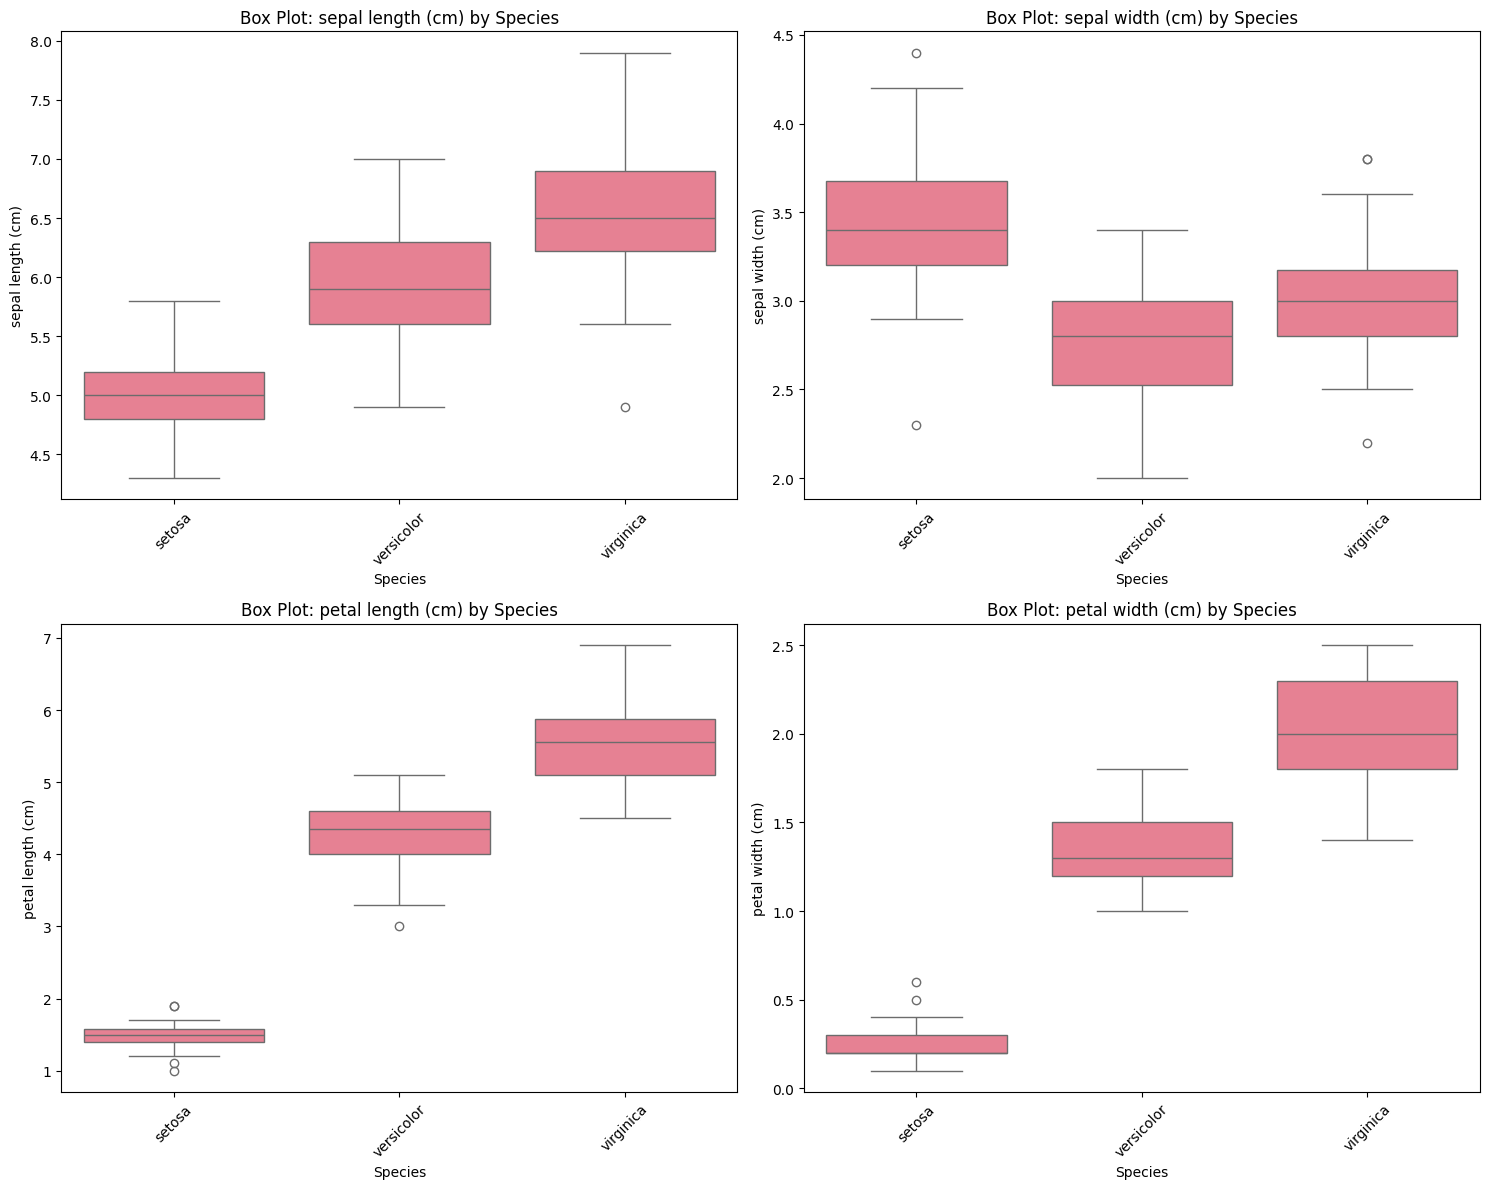

In [7]:
# Create box plots for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.boxplot(data=iris_df, x='species_name', y=feature, ax=axes[i])
    axes[i].set_title(f'Box Plot: {feature} by Species')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

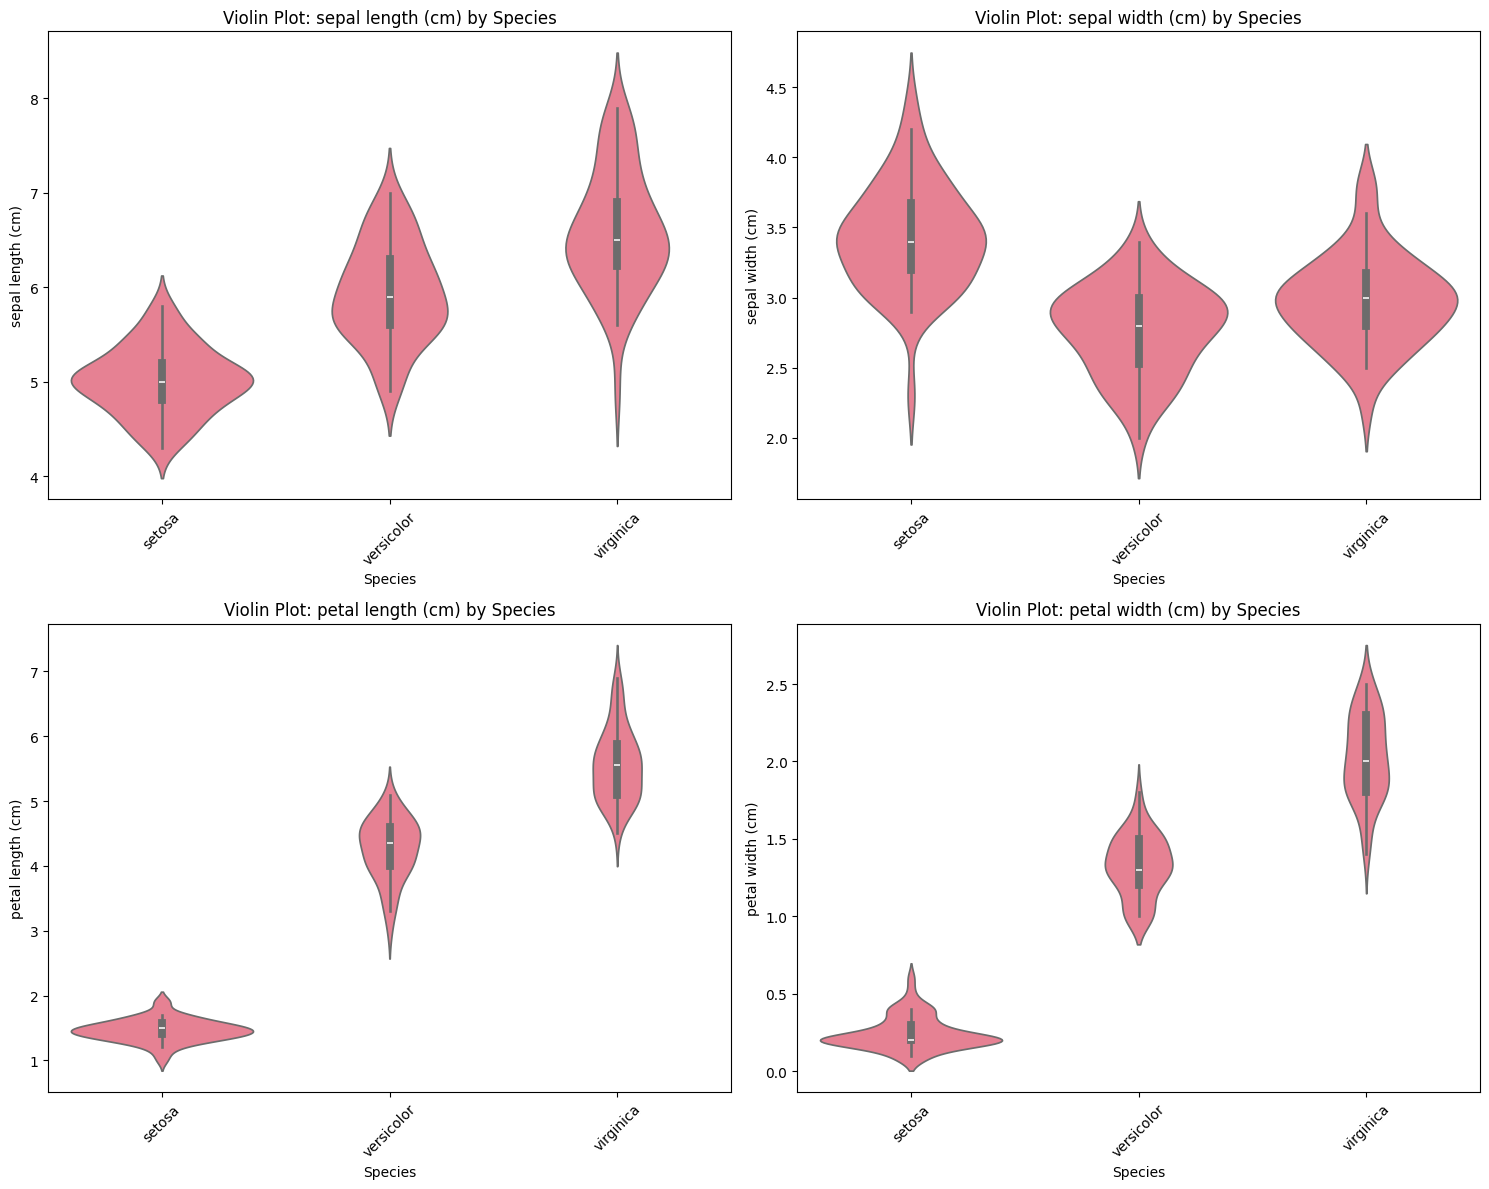

In [8]:
# Create violin plots for better distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.violinplot(data=iris_df, x='species_name', y=feature, ax=axes[i])
    axes[i].set_title(f'Violin Plot: {feature} by Species')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 5. Interaction Plots

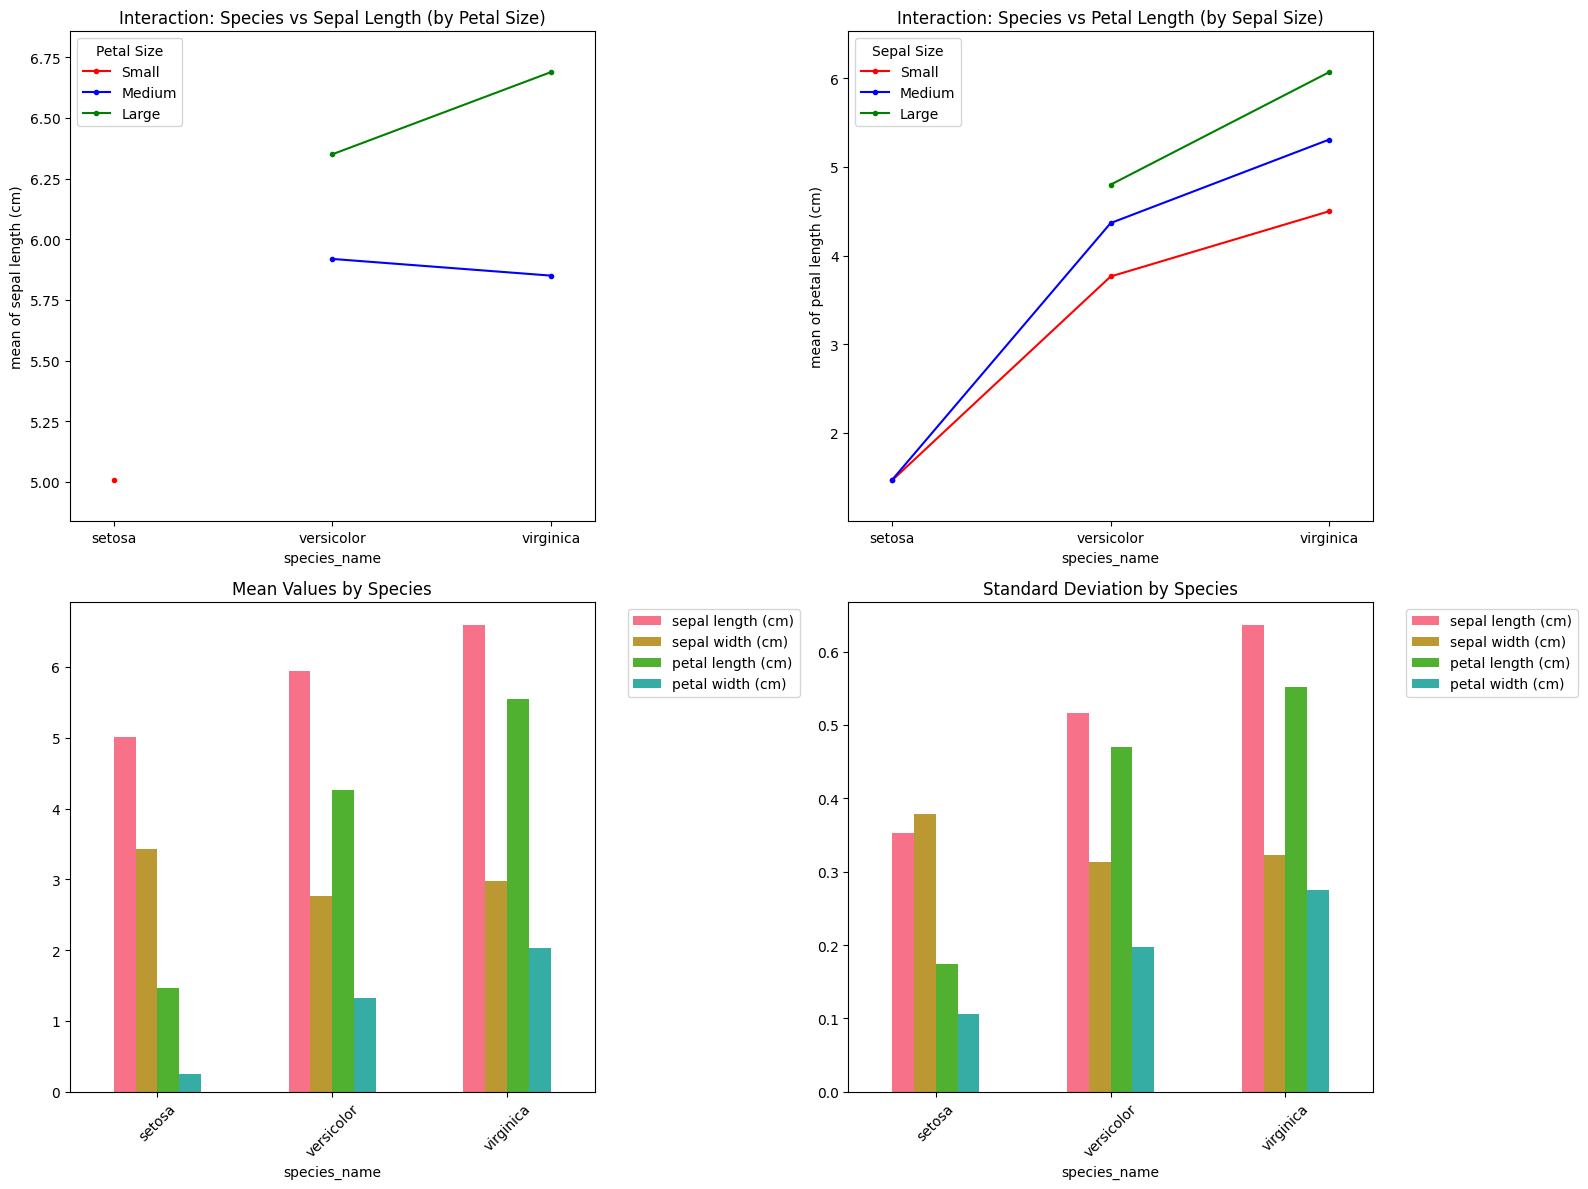

In [9]:
# Create interaction plots
from statsmodels.graphics.factorplots import interaction_plot

# Create a combined plot for interaction analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# Create categorical variables for interaction analysis
iris_df['sepal_size'] = pd.cut(iris_df['sepal length (cm)'], bins=3, labels=['Small', 'Medium', 'Large'])
iris_df['petal_size'] = pd.cut(iris_df['petal length (cm)'], bins=3, labels=['Small', 'Medium', 'Large'])

# Plot 1: Species vs Sepal Length grouped by Petal Size
interaction_plot(iris_df['species_name'], iris_df['petal_size'], 
                iris_df['sepal length (cm)'], ax=axes[0], colors=['red', 'blue', 'green'])
axes[0].set_title('Interaction: Species vs Sepal Length (by Petal Size)')
axes[0].legend(title='Petal Size')

# Plot 2: Species vs Petal Length grouped by Sepal Size
interaction_plot(iris_df['species_name'], iris_df['sepal_size'], 
                iris_df['petal length (cm)'], ax=axes[1], colors=['red', 'blue', 'green'])
axes[1].set_title('Interaction: Species vs Petal Length (by Sepal Size)')
axes[1].legend(title='Sepal Size')

# Plot 3: Mean comparison plot
means_data = iris_df.groupby('species_name')[features].mean()
means_data.plot(kind='bar', ax=axes[2], rot=45)
axes[2].set_title('Mean Values by Species')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 4: Standard deviation comparison
std_data = iris_df.groupby('species_name')[features].std()
std_data.plot(kind='bar', ax=axes[3], rot=45)
axes[3].set_title('Standard Deviation by Species')
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 6. Advanced ANOVA with Statsmodels

In [10]:
# Using statsmodels for more detailed ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

print("Detailed ANOVA Results using Statsmodels:")
print("=" * 60)

for feature in features:
    # Clean column name for formula
    clean_feature = feature.replace(' ', '_').replace('(', '').replace(')', '')
    iris_df[clean_feature] = iris_df[feature]
    
    # Fit the model
    formula = f"{clean_feature} ~ C(species_name)"
    model = ols(formula, data=iris_df).fit()
    anova_table = anova_lm(model, typ=2)
    
    print(f"\n{feature}:")
    print(anova_table)
    
    # Calculate effect size (eta squared)
    ss_between = anova_table.loc['C(species_name)', 'sum_sq']
    ss_total = anova_table['sum_sq'].sum()
    eta_squared = ss_between / ss_total
    print(f"Effect Size (η²): {eta_squared:.4f}")

Detailed ANOVA Results using Statsmodels:

sepal length (cm):
                    sum_sq     df           F        PR(>F)
C(species_name)  63.212133    2.0  119.264502  1.669669e-31
Residual         38.956200  147.0         NaN           NaN
Effect Size (η²): 0.6187

sepal width (cm):
                    sum_sq     df         F        PR(>F)
C(species_name)  11.344933    2.0  49.16004  4.492017e-17
Residual         16.962000  147.0       NaN           NaN
Effect Size (η²): 0.4008

petal length (cm):
                   sum_sq     df            F        PR(>F)
C(species_name)  437.1028    2.0  1180.161182  2.856777e-91
Residual          27.2226  147.0          NaN           NaN
Effect Size (η²): 0.9414

petal width (cm):
                    sum_sq     df           F        PR(>F)
C(species_name)  80.413333    2.0  960.007147  4.169446e-85
Residual          6.156600  147.0         NaN           NaN
Effect Size (η²): 0.9289


## 7. Post-hoc Tests (Tukey HSD)

Tukey HSD Post-hoc Test Results:

sepal length (cm):
------------------------------
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------


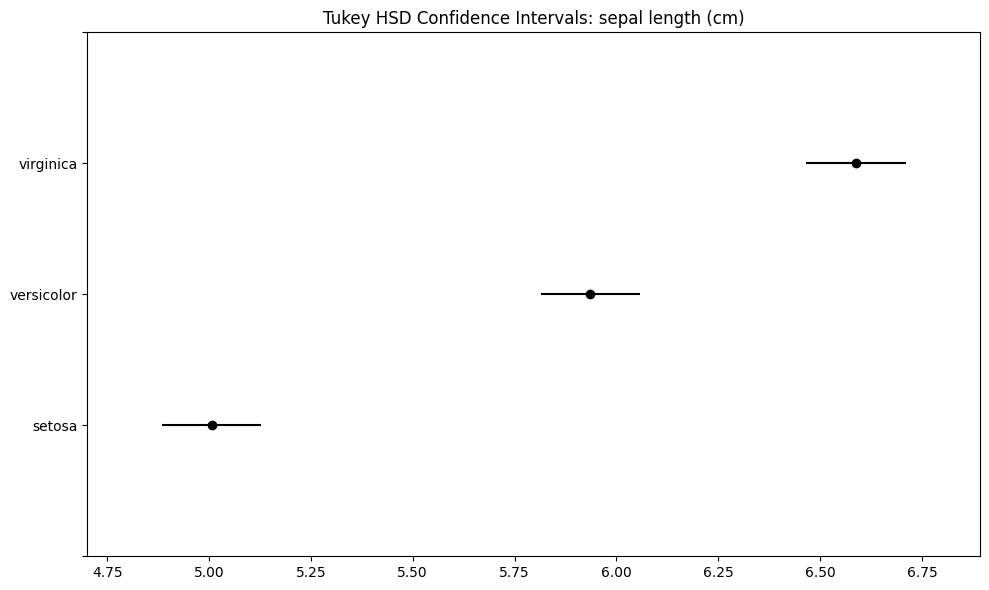


sepal width (cm):
------------------------------
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658    0.0 -0.8189 -0.4971   True
    setosa  virginica   -0.454    0.0 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658    0.0 -0.8189 -0.4971   True
    setosa  virginica   -0.454    0.0 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------


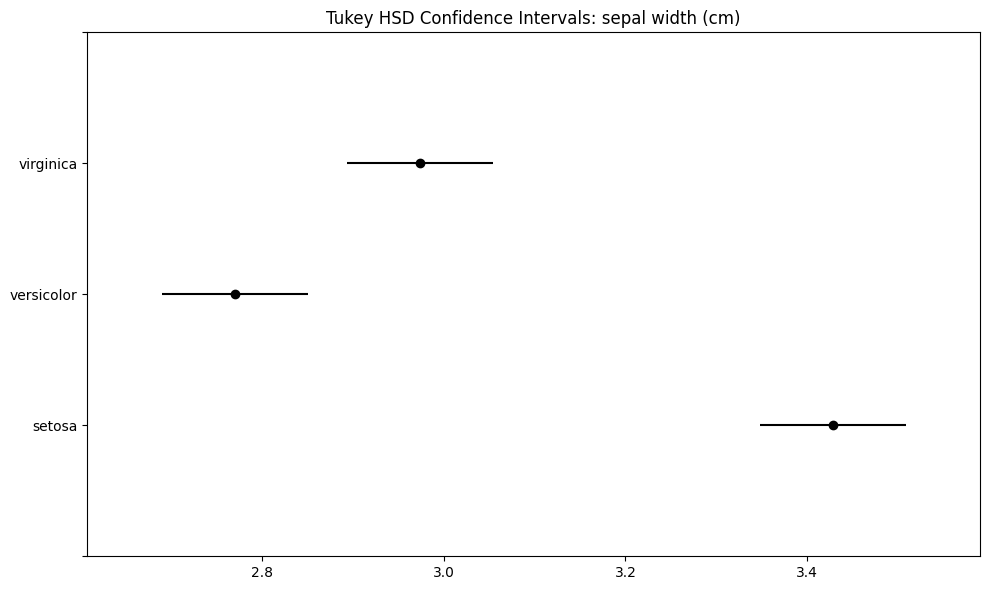


petal length (cm):
------------------------------
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


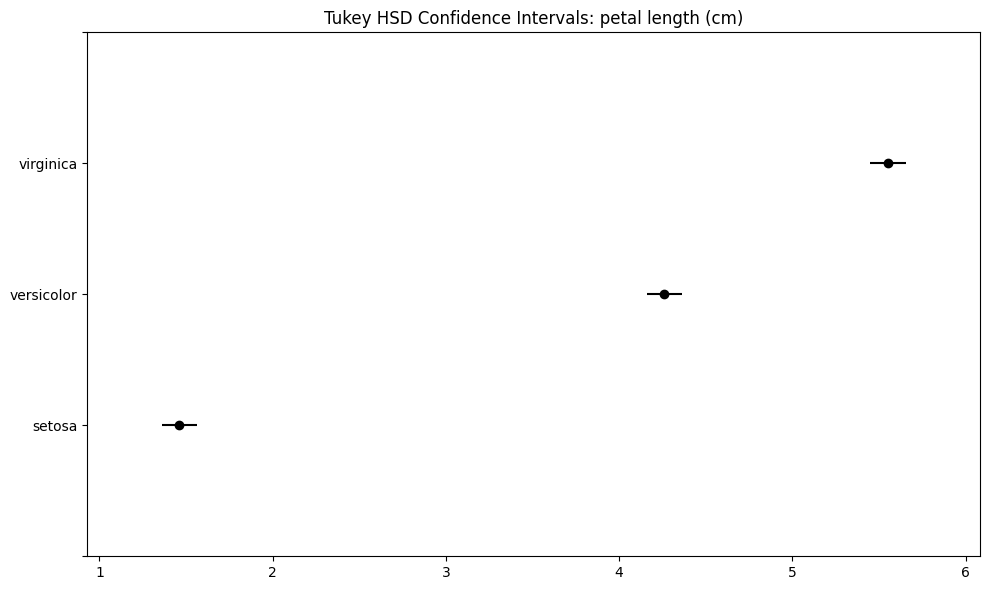


petal width (cm):
------------------------------
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     1.08   0.0 0.9831 1.1769   True
    setosa  virginica     1.78   0.0 1.6831 1.8769   True
versicolor  virginica      0.7   0.0 0.6031 0.7969   True
---------------------------------------------------------
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     1.08   0.0 0.9831 1.1769   True
    setosa  virginica     1.78   0.0 1.6831 1.8769   True
versicolor  virginica      0.7   0.0 0.6031 0.7969   True
---------------------------------------------------------


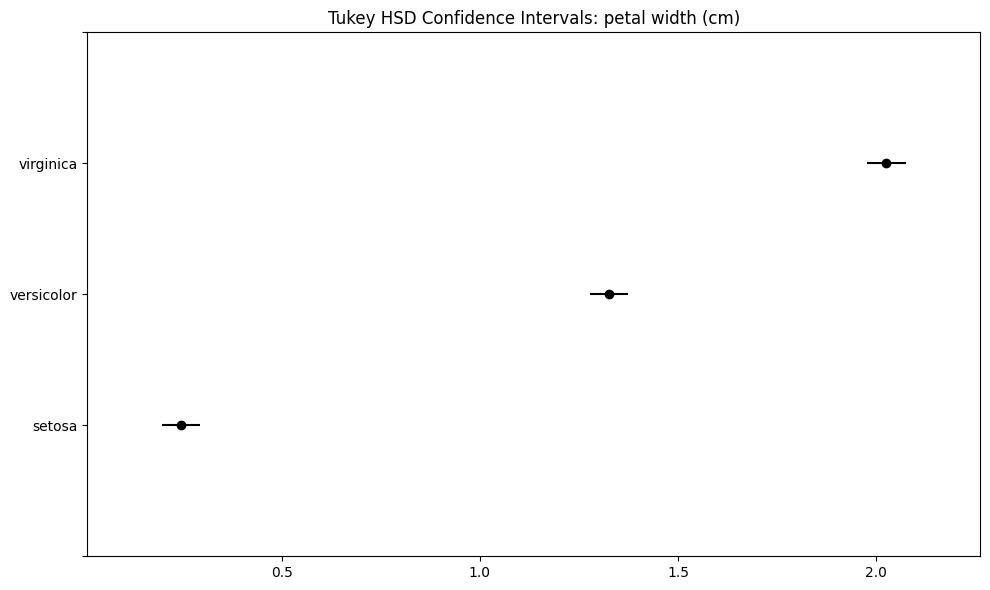

In [11]:
# Perform Tukey HSD post-hoc tests
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("Tukey HSD Post-hoc Test Results:")
print("=" * 50)

for feature in features:
    print(f"\n{feature}:")
    print("-" * 30)
    
    # Perform Tukey HSD test
    tukey_result = pairwise_tukeyhsd(iris_df[feature], iris_df['species_name'], alpha=0.05)
    print(tukey_result)
    
    # Create a plot for the Tukey test
    fig, ax = plt.subplots(figsize=(10, 6))
    tukey_result.plot_simultaneous(ax=ax)
    ax.set_title(f'Tukey HSD Confidence Intervals: {feature}')
    plt.tight_layout()
    plt.show()

## 8. ANOVA Assumptions Testing

In [12]:
# Test ANOVA assumptions
from scipy.stats import shapiro, levene

print("ANOVA Assumptions Testing:")
print("=" * 40)

for feature in features:
    print(f"\n{feature}:")
    print("-" * 25)
    
    # Separate groups
    setosa = iris_df[iris_df['species_name'] == 'setosa'][feature]
    versicolor = iris_df[iris_df['species_name'] == 'versicolor'][feature]
    virginica = iris_df[iris_df['species_name'] == 'virginica'][feature]
    
    # Test for normality (Shapiro-Wilk test)
    print("1. Normality Test (Shapiro-Wilk):")
    for species_name, data in [('Setosa', setosa), ('Versicolor', versicolor), ('Virginica', virginica)]:
        stat, p = shapiro(data)
        print(f"   {species_name}: p-value = {p:.4f} ({'Normal' if p > 0.05 else 'Not Normal'})")
    
    # Test for equal variances (Levene's test)
    print("\n2. Homogeneity of Variance (Levene's Test):")
    stat, p = levene(setosa, versicolor, virginica)
    print(f"   p-value = {p:.4f} ({'Equal variances' if p > 0.05 else 'Unequal variances'})")

ANOVA Assumptions Testing:

sepal length (cm):
-------------------------
1. Normality Test (Shapiro-Wilk):
   Setosa: p-value = 0.4595 (Normal)
   Versicolor: p-value = 0.4647 (Normal)
   Virginica: p-value = 0.2583 (Normal)

2. Homogeneity of Variance (Levene's Test):
   p-value = 0.0023 (Unequal variances)

sepal width (cm):
-------------------------
1. Normality Test (Shapiro-Wilk):
   Setosa: p-value = 0.2715 (Normal)
   Versicolor: p-value = 0.3380 (Normal)
   Virginica: p-value = 0.1809 (Normal)

2. Homogeneity of Variance (Levene's Test):
   p-value = 0.5555 (Equal variances)

petal length (cm):
-------------------------
1. Normality Test (Shapiro-Wilk):
   Setosa: p-value = 0.0548 (Normal)
   Versicolor: p-value = 0.1585 (Normal)
   Virginica: p-value = 0.1098 (Normal)

2. Homogeneity of Variance (Levene's Test):
   p-value = 0.0000 (Unequal variances)

petal width (cm):
-------------------------
1. Normality Test (Shapiro-Wilk):
   Setosa: p-value = 0.0000 (Not Normal)
   Vers

## 9. Q-Q Plots for Normality Assessment

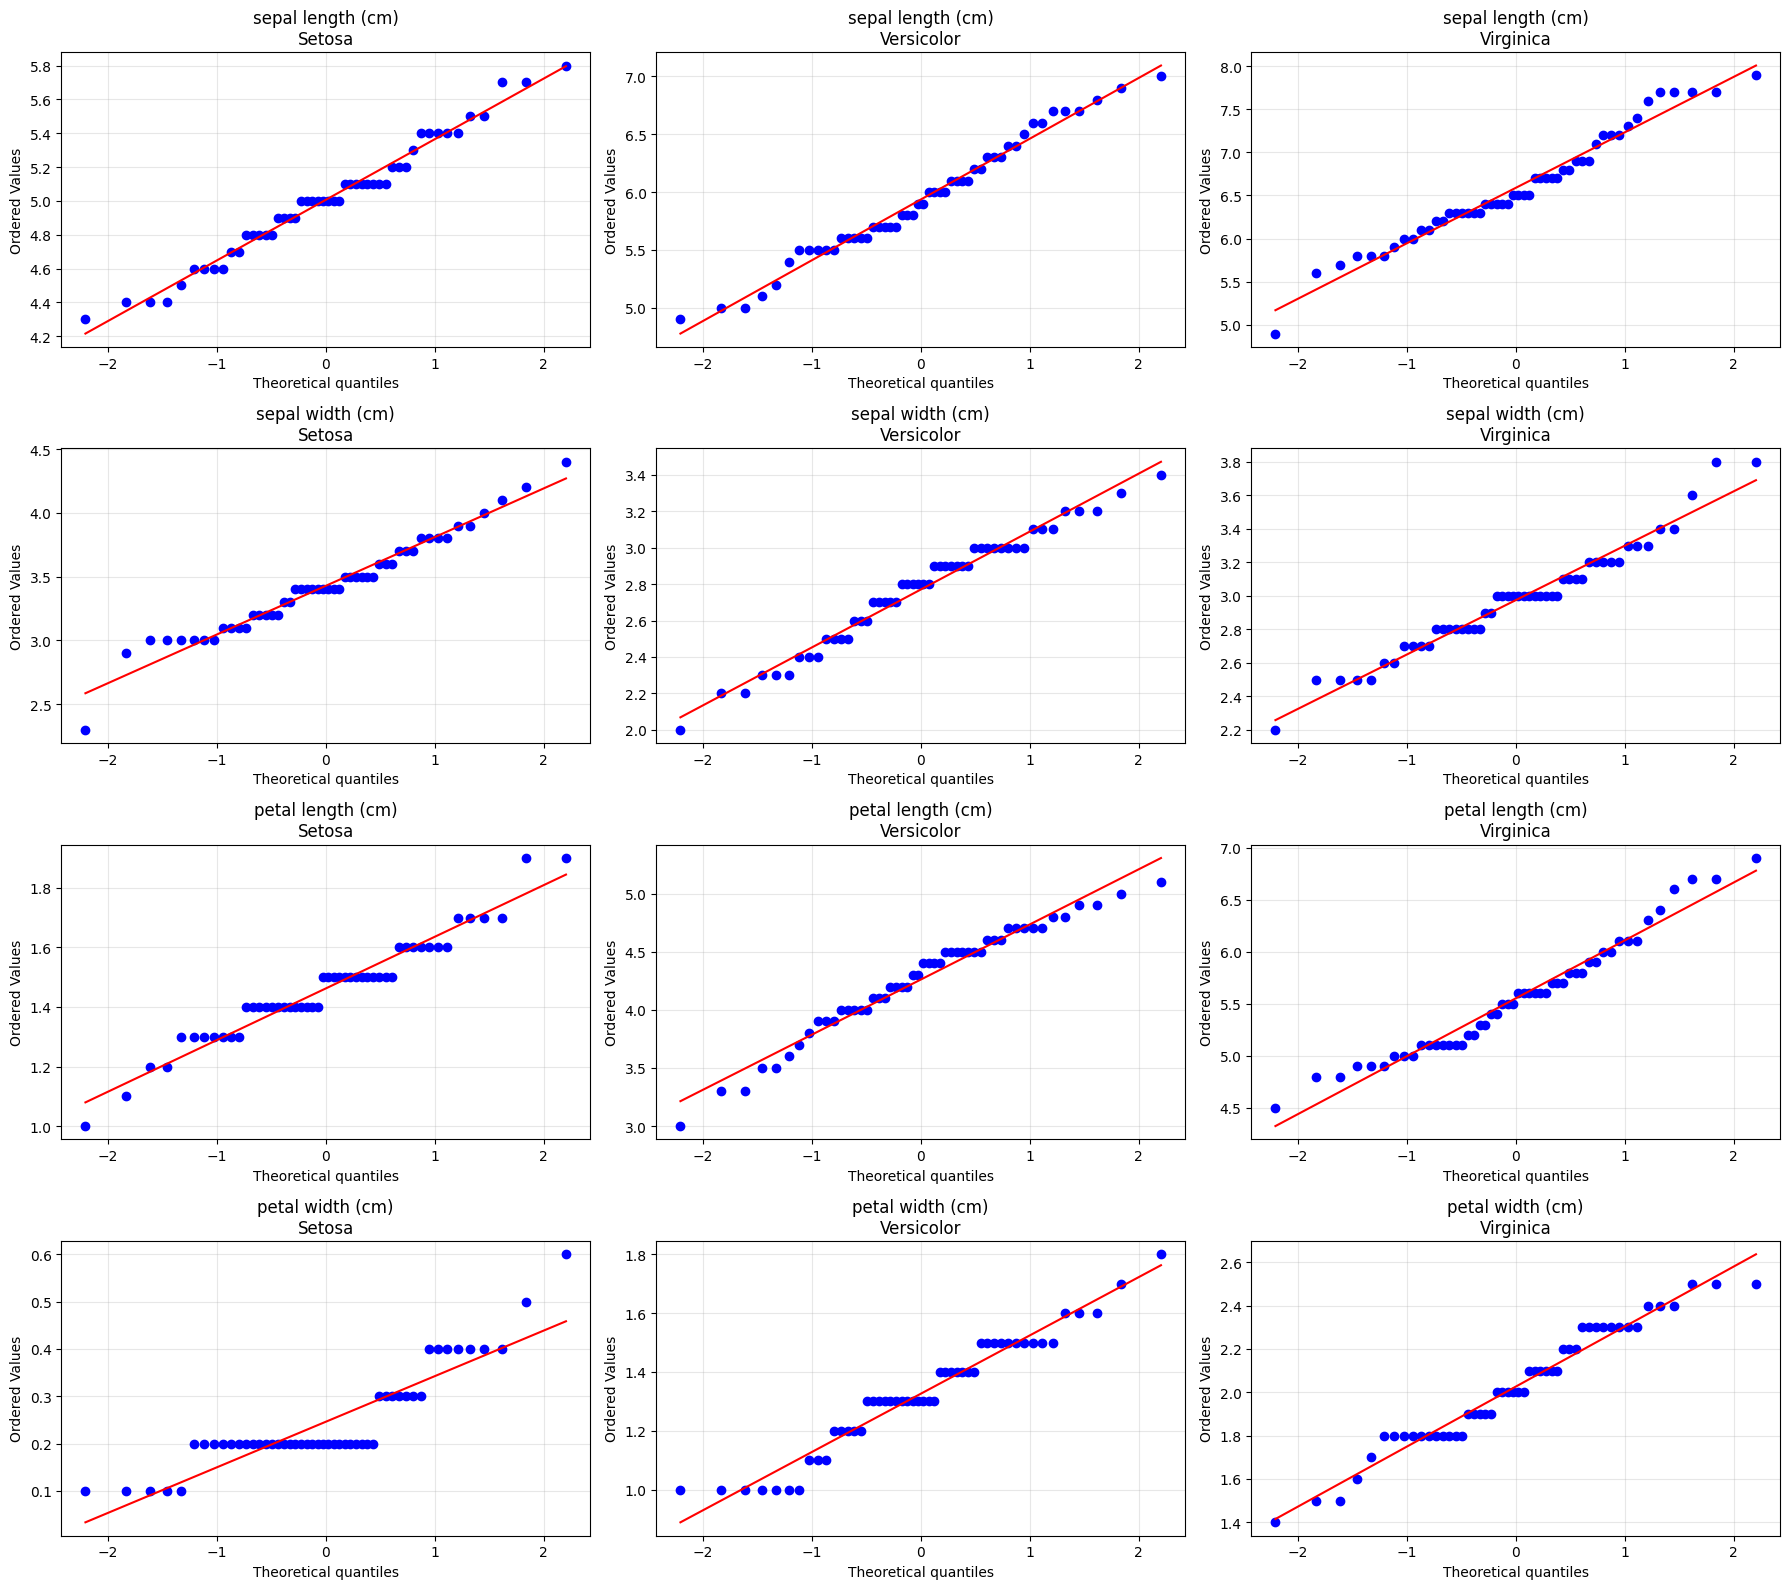

In [13]:
# Create Q-Q plots to visually assess normality
from scipy.stats import probplot

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
species_list = ['setosa', 'versicolor', 'virginica']

for i, feature in enumerate(features):
    for j, species in enumerate(species_list):
        data = iris_df[iris_df['species_name'] == species][feature]
        probplot(data, dist="norm", plot=axes[i, j])
        axes[i, j].set_title(f'{feature}\n{species.capitalize()}')
        axes[i, j].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Summary and Interpretation

In [14]:
# Create a comprehensive summary
print("ANOVA Analysis Summary")
print("=" * 50)

# Create summary DataFrame
summary_df = pd.DataFrame(anova_results).T
summary_df['Significant'] = summary_df['p-value'] < 0.05
summary_df['Effect_Size'] = ['Large' if summary_df.loc[feature, 'F-statistic'] > 10 else 
                            'Medium' if summary_df.loc[feature, 'F-statistic'] > 5 else 'Small' 
                            for feature in features]

print("\nANOVA Results Summary:")
print(summary_df.round(4))

print("\nInterpretation:")
print("-" * 20)
for feature in features:
    f_stat = summary_df.loc[feature, 'F-statistic']
    p_val = summary_df.loc[feature, 'p-value']
    significant = summary_df.loc[feature, 'Significant']
    
    print(f"\n{feature}:")
    if significant:
        print(f"  - There is a statistically significant difference between species (p < 0.001)")
        print(f"  - F-statistic = {f_stat:.2f} indicates {'strong' if f_stat > 10 else 'moderate'} effect")
        print(f"  - Post-hoc tests recommended to identify specific differences")
    else:
        print(f"  - No statistically significant difference between species (p = {p_val:.3f})")

print("\n" + "="*50)
print("CONCLUSION:")
print("The ANOVA analysis reveals significant differences between iris species")
print("for all measured features, with petal measurements showing the strongest")
print("discriminative power between species.")

ANOVA Analysis Summary

ANOVA Results Summary:
                   F-statistic  p-value  Significant Effect_Size
sepal length (cm)     119.2645      0.0         True       Large
sepal width (cm)       49.1600      0.0         True       Large
petal length (cm)    1180.1612      0.0         True       Large
petal width (cm)      960.0071      0.0         True       Large

Interpretation:
--------------------

sepal length (cm):
  - There is a statistically significant difference between species (p < 0.001)
  - F-statistic = 119.26 indicates strong effect
  - Post-hoc tests recommended to identify specific differences

sepal width (cm):
  - There is a statistically significant difference between species (p < 0.001)
  - F-statistic = 49.16 indicates strong effect
  - Post-hoc tests recommended to identify specific differences

petal length (cm):
  - There is a statistically significant difference between species (p < 0.001)
  - F-statistic = 1180.16 indicates strong effect
  - Post-hoc tes